In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [22]:
data = pd.read_csv("../notebooks/processed_final.csv")
data

,ohe__religion_10,cat__sex,cat__income,cat__education,cat__prior_surg,cat__succ_surg,num__age,num__odi_final,num__bmi,num__dospert_ethical,num__dospert_financial,num__dospert_health/safety,num__dospert_recreational,num__dospert_social,num__height_m,num__weight_kg,num__spinal_risk_final,num__ADI_NATRANK,num__ADI_STATERNK
0,0.0,1.0,4.0,6.0,1.0,1.0,-1.452452,-0.842861,-0.996776,0.636641,1.039483,1.070493,2.802070,1.174118,-0.550706,-1.101891,2.368692,-0.449689,-1.116111
1,0.0,1.0,13.0,6.0,1.0,1.0,-1.299856,-0.706328,-0.732841,1.256535,0.379415,1.376294,1.564062,1.477776,1.178413,-0.223616,3.124484,0.322597,0.338531
2,1.0,2.0,11.0,6.0,1.0,1.0,-1.706778,-0.979394,-1.089714,-0.396516,-1.435771,-1.070112,-1.049511,-0.799657,-1.044740,-1.337526,-0.261439,0.028393,-0.752450
3,0.0,1.0,6.0,7.0,1.0,1.0,-1.147260,-0.296729,0.635067,-0.603147,-0.775703,0.153091,0.050940,-0.647828,0.684379,0.933138,-0.238772,-1.663281,-1.479771
4,1.0,1.0,4.0,7.0,1.0,1.0,-1.452452,-0.842861,-0.245463,0.016747,-1.435771,2.140796,0.463610,0.263145,1.425430,0.397604,0.489517,-0.596791,-1.479771
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
797,0.0,1.0,1.0,6.0,1.0,1.0,-1.706778,-0.979394,-0.548061,-0.396516,-0.445669,-0.305610,-0.361729,-0.496000,1.178413,-0.030823,-0.471887,0.359373,0.338531
798,0.0,2.0,1.0,6.0,0.0,0.0,-1.299856,-0.569795,0.176854,1.463166,0.709449,1.834995,0.463610,0.718631,-0.303689,0.012019,-0.037583,0.285821,0.702192
799,0.0,1.0,4.0,5.0,0.0,0.0,-0.486011,-0.296729,-0.345363,-0.396516,-1.435771,0.917593,-0.499285,-0.951486,1.425430,0.290497,-0.428614,1.756842,1.793173
800,1.0,2.0,12.0,8.0,1.0,1.0,0.734756,-0.569795,0.371838,-1.016410,1.039483,-1.223012,-0.361729,1.174118,-0.303689,0.183390,0.141639,-1.552954,-1.116111


In [30]:

X = data.drop(['num__spinal_risk_final'], axis=1)  # All columns except the last one are predictors
y = data[['num__spinal_risk_final']]   # The last column is the response variable

In [35]:
X

,ohe__religion_10,cat__sex,cat__income,cat__education,cat__prior_surg,cat__succ_surg,num__age,num__odi_final,num__bmi,num__dospert_ethical,num__dospert_financial,num__dospert_health/safety,num__dospert_recreational,num__dospert_social,num__height_m,num__weight_kg,num__ADI_NATRANK,num__ADI_STATERNK
0,0.0,1.0,4.0,6.0,1.0,1.0,-1.452452,-0.842861,-0.996776,0.636641,1.039483,1.070493,2.802070,1.174118,-0.550706,-1.101891,-0.449689,-1.116111
1,0.0,1.0,13.0,6.0,1.0,1.0,-1.299856,-0.706328,-0.732841,1.256535,0.379415,1.376294,1.564062,1.477776,1.178413,-0.223616,0.322597,0.338531
2,1.0,2.0,11.0,6.0,1.0,1.0,-1.706778,-0.979394,-1.089714,-0.396516,-1.435771,-1.070112,-1.049511,-0.799657,-1.044740,-1.337526,0.028393,-0.752450
3,0.0,1.0,6.0,7.0,1.0,1.0,-1.147260,-0.296729,0.635067,-0.603147,-0.775703,0.153091,0.050940,-0.647828,0.684379,0.933138,-1.663281,-1.479771
4,1.0,1.0,4.0,7.0,1.0,1.0,-1.452452,-0.842861,-0.245463,0.016747,-1.435771,2.140796,0.463610,0.263145,1.425430,0.397604,-0.596791,-1.479771
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
797,0.0,1.0,1.0,6.0,1.0,1.0,-1.706778,-0.979394,-0.548061,-0.396516,-0.445669,-0.305610,-0.361729,-0.496000,1.178413,-0.030823,0.359373,0.338531
798,0.0,2.0,1.0,6.0,0.0,0.0,-1.299856,-0.569795,0.176854,1.463166,0.709449,1.834995,0.463610,0.718631,-0.303689,0.012019,0.285821,0.702192
799,0.0,1.0,4.0,5.0,0.0,0.0,-0.486011,-0.296729,-0.345363,-0.396516,-1.435771,0.917593,-0.499285,-0.951486,1.425430,0.290497,1.756842,1.793173
800,1.0,2.0,12.0,8.0,1.0,1.0,0.734756,-0.569795,0.371838,-1.016410,1.039483,-1.223012,-0.361729,1.174118,-0.303689,0.183390,-1.552954,-1.116111


In [37]:
y

,num__spinal_risk_final
0,2.368692
1,3.124484
2,-0.261439
3,-0.238772
4,0.489517
...,...
797,-0.471887
798,-0.037583
799,-0.428614
800,0.141639


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

(array([719.,  59.,  13.,   4.,   3.,   2.,   0.,   0.,   1.,   1.]),
 array([-0.65544345,  0.66666647,  1.9887764 ,  3.31088633,  4.63299626,
         5.95510618,  7.27721611,  8.59932604,  9.92143597, 11.24354589,
        12.56565582]),
 <BarContainer object of 10 artists>)

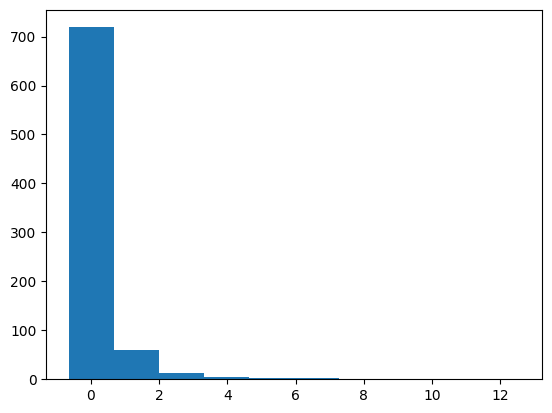

In [42]:
plt.hist(y)

In [33]:
#XGBOOST, LINEAR REGRESSION, RANDOM FOREST, DECISION TREE REGRESSOR, 
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest Regression': RandomForestRegressor(),
    'XGBoost Regression': XGBRegressor(),
    'Decision Tree Regression': DecisionTreeRegressor()
}

In [43]:
predictions = {}
for model_name, model in models.items():
    pipeline = Pipeline([
        ('scaler', StandardScaler()),  # You can add preprocessing steps here if needed
        ('model', model)
    ])
    
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    
    mse = mean_squared_error(y_test, y_pred)
    print(f'{model_name} - Mean Squared Error: {mse}')
    predictions[model_name] = y_pred

Linear Regression - Mean Squared Error: 0.8513754766165257


/Users/markqiao/anaconda3/envs/vm-spinal-risk/lib/python3.10/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random Forest Regression - Mean Squared Error: 0.8205769753205928
XGBoost Regression - Mean Squared Error: 0.9320763514596784
Decision Tree Regression - Mean Squared Error: 0.9850363607332964


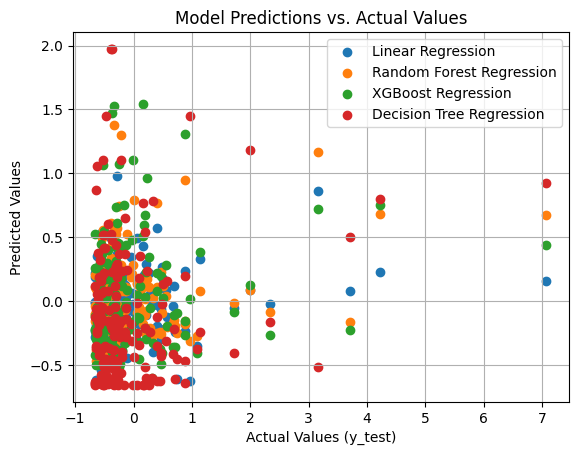

In [44]:
for model_name, y_pred in predictions.items():
    plt.scatter(y_test, y_pred, label=model_name)

plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values')
plt.title('Model Predictions vs. Actual Values')
plt.legend()
plt.grid(True)
plt.show()